# (a)

In [2]:
'''>>>>> start CodeP4.1F21
    V.P. Carey ME249, Fall 2021

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import math
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# define meadian values of input variables - add your values here
Dmed = 1.  #make sure Tamed does not = 0
Qmed = 1.
Mmed = 1.

#create input data array
xdata = []


#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
#xdata = [[-10.0, 350, 4.464]] 
#xdata.append([-10.0, 650, 4.464]) 
#xdata.append([-10.0, 950, 4.464]) 
#xdata.append([-10.0, 1250, 4.464])
xdata.append([0.008, 550, 0.06157])     #导入新数据
xdata.append([0.008, 650, 0.07269])
xdata.append([0.008, 750, 0.08396])
xdata.append([0.008, 850, 0.09347])
xdata.append([0.008, 950, 0.10635])
xdata.append([0.008, 1050, 0.11521])
xdata.append([0.008, 1150, 0.1287])
xdata.append([0.008, 850, 0.09516])
xdata.append([0.008, 550, 0.04398])
xdata.append([0.008, 750, 0.05997])
xdata.append([0.008, 950, 0.07596])
xdata.append([0.008, 1050, 0.08343])
xdata.append([0.008, 1150, 0.0919])
xdata.append([0.008, 850, 0.06797])
xdata.append([0.008, 550, 0.0342])
xdata.append([0.008, 750, 0.04664])
xdata.append([0.008, 950, 0.05908])
xdata.append([0.008, 1150, 0.0715])
xdata.append([0.008, 850, 0.05286])
xdata.append([0.011, 550, 0.0846])
xdata.append([0.011, 750, 0.1154])
xdata.append([0.011, 950, 0.1462])
xdata.append([0.011, 1150, 0.177])
xdata.append([0.011, 850, 0.1308])
xdata.append([0.011, 550, 0.06047])
xdata.append([0.011, 750, 0.08246])
xdata.append([0.011, 950, 0.1044])
xdata.append([0.011, 1050, 0.1134])
xdata.append([0.011, 1150, 0.1264])
xdata.append([0.011, 850, 0.0934])
xdata.append([0.011, 550, 0.047])
xdata.append([0.011, 750, 0.06413])
xdata.append([0.011, 950, 0.08124])
xdata.append([0.011, 1150, 0.09834])
xdata.append([0.011, 850, 0.072691])
xdata.append([0.011, 700, 0.087196])
xdata.append([0.013, 550, 0.10005])
xdata.append([0.013, 750, 0.13644])
xdata.append([0.013, 950, 0.17282])
xdata.append([0.013, 1150, 0.2092])
xdata.append([0.013, 850, 0.15463])
xdata.append([0.013, 550, 0.07147])
xdata.append([0.013, 750, 0.09745])
xdata.append([0.013, 950, 0.12344])
xdata.append([0.013, 1050, 0.13302])
xdata.append([0.013, 1150, 0.1494])
xdata.append([0.013, 850, 0.11045])
xdata.append([0.013, 550, 0.05558])
xdata.append([0.013, 750, 0.0758])
xdata.append([0.013, 950, 0.09601])
xdata.append([0.013, 1150, 0.1162])
xdata.append([0.013, 850, 0.0859])


''' ADD THE REST OF THE INPUT DATA AND CONVERT TO:
xdata = [[-10.0/Tamed, 350/IDmed, 4.464/RLmed]] 
xdata.append([-10.0/Tamed, 650/IDmed, 4.464/RLmed]) 
xdata.append([-10.0/Tamed, 950/IDmed, 4.464/RLmed]) 
xdata.append([-10.0/Tamed, 1250/IDmed, 4.464/RLmed]) 
... etc.'''



# define meadian values of input variables - add your values here
Xmed = 1.
Tmed = 1

#create input data array
ydata = []

#Part 1 output data: VL (V) and Power out Wd (W)
ydata.append([0.525, 306.7])
ydata.append([0.525, 298.5])
ydata.append([0.525, 294.5])
ydata.append([0.525, 290.2])
ydata.append([0.524, 286.9])
ydata.append([0.524, 284.1])
ydata.append([0.525, 281.7])
ydata.append([0.524, 290.3])
ydata.append([0.734, 307.9])
ydata.append([0.735, 295.5])
ydata.append([0.735, 287.8])
ydata.append([0.735, 285.0])
ydata.append([0.735, 282.5])
ydata.append([0.734, 291.3])
ydata.append([ 0.945, 308.6])
ydata.append([0.945, 296.2])
ydata.append([0.945, 288.5])
ydata.append([0.945, 283.1])
ydata.append([0.945, 291.9])
ydata.append([ 0.525, 328.0])
ydata.append([0.525, 311.2])
ydata.append([0.525, 300.8])
ydata.append([0.525, 293.6])
ydata.append([0.525, 305.5])
ydata.append([0.735, 329.6])
ydata.append([0.735, 312.6])
ydata.append([0.735, 302.0])
ydata.append([0.735, 299.4])
ydata.append([0.735, 294.8])
ydata.append([0.735, 306.8])
ydata.append([ 0.945, 330.7])
ydata.append([0.945, 313.6])
ydata.append([0.944, 302.9])
ydata.append([0.945, 295.6])
ydata.append([0.944, 307.7])
ydata.append([0.734, 324.7])
ydata.append([0.525, 342.2])
ydata.append([0.524,  322.3])
ydata.append([0.524, 310.0])
ydata.append([0.525, 301.6])
ydata.append([0.524, 315.5])
ydata.append([0.734, 344.1])
ydata.append([0.735, 324.0])
ydata.append([0.735, 311.5])
ydata.append([0.735, 306.3])
ydata.append([0.735, 302.9])
ydata.append([0.734, 317.1])
ydata.append([0.945, 345.3])
ydata.append([0.944, 325.1])
ydata.append([0.944, 312.5])
ydata.append([0.945, 303.9])
ydata.append([0.945, 318.2])
''' ADD THE REST OF THE OUPUT DATA AND CONVERT TO:
ydata = [[18.9/VLmed, 80.3/Wdmed]] 
ydata.append([23.5/VLmed, 124.6/Wdmed]) 
ydata.append([24.8/VLmed, 138.6/Wdmed]) 
ydata.append([25.6/VLmed, 146.9/Wdmed]) 
... etc.'''

xarray= np.array(xdata)
yarray= np.array(ydata)
Dmed= np.median(xarray[:,0])
Qmed= np.median(xarray[:,1])
Mmed= np.median(xarray[:,2])
Xmed= np.median(yarray[:,0])
Tmed= np.median(yarray[:,1])



Xmedian = [Dmed,Qmed,Mmed]   # determine median value, divide
Ymedian = [Xmed ,Tmed]
X_nor=xarray/Xmedian
Y_nor=yarray/Ymedian
print(Dmed)
print(Qmed)
print(Mmed)
print(Xmed)
print(Tmed)
print(X_nor)
print(Y_nor)

0.011
850.0
0.09265
0.735
304.7
[[0.72727273 0.64705882 0.66454398]
 [0.72727273 0.76470588 0.78456557]
 [0.72727273 0.88235294 0.90620615]
 [0.72727273 1.         1.00885051]
 [0.72727273 1.11764706 1.14786832]
 [0.72727273 1.23529412 1.24349703]
 [0.72727273 1.35294118 1.38909876]
 [0.72727273 1.         1.0270912 ]
 [0.72727273 0.64705882 0.47468969]
 [0.72727273 0.88235294 0.64727469]
 [0.72727273 1.11764706 0.81985969]
 [0.72727273 1.23529412 0.9004857 ]
 [0.72727273 1.35294118 0.99190502]
 [0.72727273 1.         0.73362115]
 [0.72727273 0.64705882 0.36913114]
 [0.72727273 0.88235294 0.50339989]
 [0.72727273 1.11764706 0.63766865]
 [0.72727273 1.35294118 0.77172153]
 [0.72727273 1.         0.57053427]
 [1.         0.64705882 0.91311387]
 [1.         0.88235294 1.24554776]
 [1.         1.11764706 1.57798165]
 [1.         1.35294118 1.91041554]
 [1.         1.         1.41176471]
 [1.         0.64705882 0.65267134]
 [1.         0.88235294 0.89001619]
 [1.         1.11764706 1.126821

# (b)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_nor, Y_nor, test_size=1/4)

# (c)

In [4]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([   # dense层：全连接   activation:激活函数
    keras.layers.Dense(6, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


2021-12-06 15:43:37.129615: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-06 15:43:37.133966: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [5]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.00020)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [6]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(   #callback:回调函数
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(X_train,Y_train,epochs=500,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Epoch 1/500
39/39 [==============================] - 2s 41ms/step - loss: 0.2795
Epoch 2/500
39/39 [==============================] - 0s 215us/step - loss: 0.2707
Epoch 3/500
39/39 [==============================] - 0s 425us/step - loss: 0.2671
Epoch 4/500
39/39 [==============================] - 0s 434us/step - loss: 0.2645
Epoch 5/500
39/39 [==============================] - 0s 524us/step - loss: 0.2632
Epoch 6/500
39/39 [==============================] - 0s 438us/step - loss: 0.2622
Epoch 7/500
39/39 [==============================] - 0s 377us/step - loss: 0.2616
Epoch 8/500
39/39 [==============================] - 0s 438us/step - loss: 0.2604
Epoch 9/500
39/39 [==============================] - 0s 523us/step - loss: 0.2594
Epoch 10/500
39/39 [==============================] - 0s 449us/step - loss: 0.2585
Epoch 11/500
39/39 [==============================] - 0s 879us/step - loss: 0.2578
Epoch 12/500
39/39 [==============================] - 0s 694us/step - loss: 0.2578
Epoch 13/500
3

39/39 [==============================] - 0s 241us/step - loss: 0.2156
Epoch 100/500
39/39 [==============================] - 0s 225us/step - loss: 0.2155
Epoch 101/500
39/39 [==============================] - 0s 202us/step - loss: 0.2151
Epoch 102/500
39/39 [==============================] - 0s 216us/step - loss: 0.2145
Epoch 103/500
39/39 [==============================] - 0s 219us/step - loss: 0.2144
Epoch 104/500
39/39 [==============================] - 0s 187us/step - loss: 0.2137
Epoch 105/500
39/39 [==============================] - 0s 362us/step - loss: 0.2135
Epoch 106/500
39/39 [==============================] - 0s 322us/step - loss: 0.2133
Epoch 107/500
39/39 [==============================] - 0s 434us/step - loss: 0.2129
Epoch 108/500
39/39 [==============================] - 0s 423us/step - loss: 0.2125
Epoch 109/500
39/39 [==============================] - 0s 486us/step - loss: 0.2121
Epoch 110/500
39/39 [==============================] - 0s 424us/step - loss: 0.2118
Epoch 

39/39 [==============================] - 0s 396us/step - loss: 0.1847
Epoch 197/500
39/39 [==============================] - 0s 321us/step - loss: 0.1844
Epoch 198/500
39/39 [==============================] - 0s 261us/step - loss: 0.1842
Epoch 199/500
39/39 [==============================] - 0s 430us/step - loss: 0.1841
Epoch 200/500
39/39 [==============================] - 0s 406us/step - loss: 0.1839
Epoch 201/500
39/39 [==============================] - 0s 565us/step - loss: 0.1839
Epoch 202/500
39/39 [==============================] - ETA: 0s - loss: 0.186 - 0s 479us/step - loss: 0.1835
Epoch 203/500
39/39 [==============================] - 0s 190us/step - loss: 0.1835
Epoch 204/500
39/39 [==============================] - 0s 374us/step - loss: 0.1836
Epoch 205/500
39/39 [==============================] - 0s 449us/step - loss: 0.1836
Epoch 206/500
39/39 [==============================] - 0s 414us/step - loss: 0.1831
Epoch 207/500
39/39 [==============================] - 0s 310us/st

39/39 [==============================] - 0s 274us/step - loss: 0.1602
Epoch 294/500
39/39 [==============================] - 0s 392us/step - loss: 0.1597
Epoch 295/500
39/39 [==============================] - 0s 300us/step - loss: 0.1589
Epoch 296/500
39/39 [==============================] - 0s 329us/step - loss: 0.1584
Epoch 297/500
39/39 [==============================] - 0s 403us/step - loss: 0.1582
Epoch 298/500
39/39 [==============================] - 0s 378us/step - loss: 0.1580
Epoch 299/500
39/39 [==============================] - 0s 286us/step - loss: 0.1577
Epoch 300/500
39/39 [==============================] - 0s 472us/step - loss: 0.1572
Epoch 301/500
39/39 [==============================] - 0s 377us/step - loss: 0.1571
Epoch 302/500
39/39 [==============================] - 0s 720us/step - loss: 0.1569
Epoch 303/500
39/39 [==============================] - 0s 909us/step - loss: 0.1571
Epoch 304/500
39/39 [==============================] - 0s 2ms/step - loss: 0.1563
Epoch 30

39/39 [==============================] - 0s 413us/step - loss: 0.1334
Epoch 391/500
39/39 [==============================] - 0s 269us/step - loss: 0.1331
Epoch 392/500
39/39 [==============================] - 0s 183us/step - loss: 0.1331
Epoch 393/500
39/39 [==============================] - 0s 237us/step - loss: 0.1326
Epoch 394/500
39/39 [==============================] - 0s 914us/step - loss: 0.1327
Epoch 395/500
39/39 [==============================] - 0s 549us/step - loss: 0.1324
Epoch 396/500
39/39 [==============================] - 0s 515us/step - loss: 0.1318
Epoch 397/500
39/39 [==============================] - 0s 357us/step - loss: 0.1313
Epoch 398/500
39/39 [==============================] - ETA: 0s - loss: 0.126 - 0s 515us/step - loss: 0.1310
Epoch 399/500
39/39 [==============================] - 0s 470us/step - loss: 0.1308
Epoch 400/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1305
Epoch 401/500
39/39 [==============================] - 0s 333us/step

39/39 [==============================] - 0s 417us/step - loss: 0.1082
Epoch 487/500
39/39 [==============================] - 0s 483us/step - loss: 0.1085
Epoch 488/500
39/39 [==============================] - 0s 285us/step - loss: 0.1085
Epoch 489/500
39/39 [==============================] - 0s 449us/step - loss: 0.1074
Epoch 490/500
39/39 [==============================] - 0s 530us/step - loss: 0.1080
Epoch 491/500
39/39 [==============================] - 0s 443us/step - loss: 0.1077
Epoch 492/500
39/39 [==============================] - 0s 442us/step - loss: 0.1068
Epoch 493/500
39/39 [==============================] - 0s 259us/step - loss: 0.1071
Epoch 494/500
39/39 [==============================] - 0s 286us/step - loss: 0.1068
Epoch 495/500
39/39 [==============================] - 0s 241us/step - loss: 0.1071
Epoch 496/500
39/39 [==============================] - 0s 300us/step - loss: 0.1060
Epoch 497/500
39/39 [==============================] - 0s 358us/step - loss: 0.1061
Epoch 

# (e)

In [7]:
test = []
outpt=[]

for i in range(len(X_train)):
    
    test = [[ X_train[i][0] , X_train[i][1] , X_train[i][2]]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    print ('row [0] data: inside_diameter= ', X_train[i][0]*Dmed, ', solar_flux= ', X_train[i][1]*Qmed, \
        ', mass_flow_rate= ', X_train[i][2]*Mmed,', exit_quality= ', Y_train[i][0]*Xmed,\
        ', Max_temp= ', Y_train[i][1]*Tmed,',  data value exit_quality = ', outpt[0][0]*Xmed,\
           ', data value Max_temp= ', outpt[0][1]*Tmed)

row [0] data: inside_diameter=  0.008 , solar_flux=  850.0 , mass_flow_rate=  0.05286 , exit_quality=  0.9449999999999998 , Max_temp=  291.9 ,  data value exit_quality =  0.7091063582897186 , data value Max_temp=  298.184985101223
row [0] data: inside_diameter=  0.013 , solar_flux=  550.0 , mass_flow_rate=  0.10005000000000001 , exit_quality=  0.525 , Max_temp=  342.2 ,  data value exit_quality =  0.6878254535794258 , data value Max_temp=  298.7710215210914
row [0] data: inside_diameter=  0.011 , solar_flux=  550.0 , mass_flow_rate=  0.06047000000000001 , exit_quality=  0.735 , Max_temp=  329.6 ,  data value exit_quality =  0.700578461587429 , data value Max_temp=  298.40782713890076
row [0] data: inside_diameter=  0.013 , solar_flux=  1150.0 , mass_flow_rate=  0.1494 , exit_quality=  0.735 , Max_temp=  302.9 ,  data value exit_quality =  0.7443720602989197 , data value Max_temp=  323.10936757326124
row [0] data: inside_diameter=  0.013 , solar_flux=  850.0 , mass_flow_rate=  0.15463 ,

In [12]:
pred_exit_quality=[]
data_value_exit_quality=[]
test=[]
for i in range(len(X_train)):

    test = [[ X_train[i][0] , X_train[i][1] , X_train[i][2]]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    pred_exit_quality.append(outpt[0][0]*Xmed)
    data_value_exit_quality.append(Y_train[i][0]*Xmed)

##  create a log-log plot of predicted exit quality vs. data value exit quality

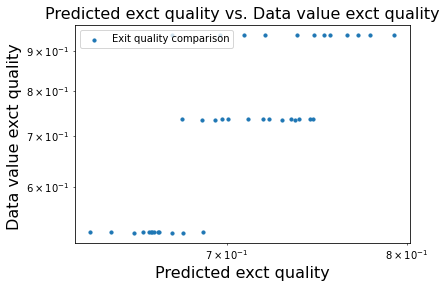

In [14]:
import matplotlib.pyplot as plt
plt.scatter(pred_exit_quality,data_value_exit_quality,s=10, label='Exit quality comparison')
plt.ylabel(r'Data value exct quality ',fontsize = 16)
plt.xlabel(r'Predicted exct quality',fontsize = 16)
plt.title('Predicted exct quality vs. Data value exct quality',fontsize=16)
plt.legend(loc='upper left')
plt.loglog()
plt.show()

## Do the same for the maximum wall temperature.

In [17]:
pred_max_wall_temp=[]
data_max_wall_temp=[]
test2=[]
for i in range(len(X_train)):

    test2 = [[ X_train[i][0] , X_train[i][1] , X_train[i][2]]]
    testarray2 = np.array(test2)
    outpt2 = model.predict(testarray2)
    pred_max_wall_temp.append(outpt2[0][1]*Tmed)
    data_max_wall_temp.append(Y_train[i][1]*Tmed)

## Plot these as a scatter plots of data points and show the slope = 1 line for comparison.

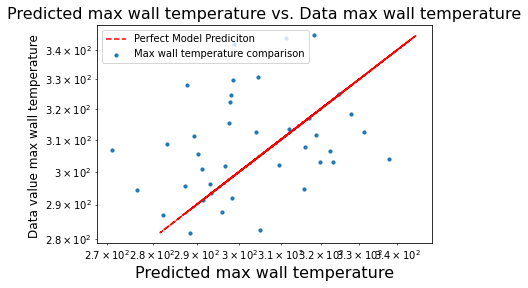

In [18]:
plt.scatter(pred_max_wall_temp,data_max_wall_temp,s=10, label='Max wall temperature comparison')
plt.plot(data_max_wall_temp,data_max_wall_temp,label='Perfect Model Prediciton', color = 'red',linestyle = '--')
plt.ylabel(r'Data value max wall temperature ',fontsize = 12)
plt.xlabel(r'Predicted max wall temperature',fontsize = 16)
plt.title('Predicted max wall temperature vs. Data max wall temperature',fontsize=16)
plt.legend(loc='upper left')
plt.loglog()
plt.show()

In [19]:
test3 = []
outpt3=[]

for i in range(len(Y_test)):
    
    test3 = [[ X_train[i][0] , X_train[i][1] , X_train[i][2]]]
    testarray3 = np.array(test3)
    outpt3 = model.predict(testarray3)
    print ('row [0] data: inside_diameter= ', X_train[i][0]*Dmed, ', solar_flux= ', X_train[i][1]*Qmed, \
        ', mass_flow_rate= ', X_train[i][2]*Mmed,', exit_quality= ', Y_train[i][0]*Xmed,\
        ', Max_temp= ', Y_train[i][1]*Tmed,',  normalized exit_quality = ', Y_test[i][0]*Xmed,\
           ', normalized Max_temp= ', Y_test[i][1]*Tmed)

row [0] data: inside_diameter=  0.013 , solar_flux=  950.0 , mass_flow_rate=  0.12344 , exit_quality=  0.735 , Max_temp=  311.5 ,  normalized exit_quality =  0.525 , normalized Max_temp=  298.5
row [0] data: inside_diameter=  0.008 , solar_flux=  1150.0 , mass_flow_rate=  0.1287 , exit_quality=  0.525 , Max_temp=  281.7 ,  normalized exit_quality =  0.735 , normalized Max_temp=  312.6
row [0] data: inside_diameter=  0.008 , solar_flux=  750.0 , mass_flow_rate=  0.08396 , exit_quality=  0.525 , Max_temp=  294.5 ,  normalized exit_quality =  0.735 , normalized Max_temp=  299.4
row [0] data: inside_diameter=  0.013 , solar_flux=  850.0 , mass_flow_rate=  0.15463 , exit_quality=  0.524 , Max_temp=  315.5 ,  normalized exit_quality =  0.734 , normalized Max_temp=  291.3
row [0] data: inside_diameter=  0.008 , solar_flux=  1050.0 , mass_flow_rate=  0.11521 , exit_quality=  0.524 , Max_temp=  284.1 ,  normalized exit_quality =  0.734 , normalized Max_temp=  344.1
row [0] data: inside_diameter

# (f)

In [20]:
predict_exit_quality=[]
normalized_exit_quality=[]
testpower=[]
test_=[]
for i in range(len(X_test)):
    test_ = [[ X_test[i][0] , X_test[i][1] , X_test[i][2]]]
    testarray = np.array(test_)
    testpower = model.predict(testarray)
    predict_exit_quality.append(Y_test[i][0]*Xmed)
    normalized_exit_quality.append(testpower[0][0]*Xmed)

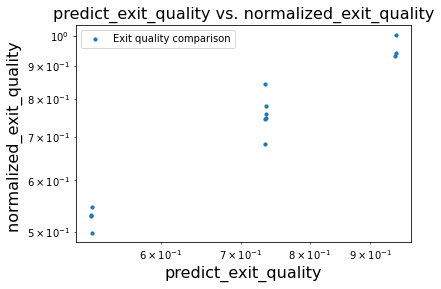

In [21]:
import matplotlib.pyplot as plt
plt.scatter(predict_exit_quality,normalized_exit_quality,s=10, label='Exit quality comparison')
plt.ylabel(r'normalized_exit_quality ',fontsize = 16)
plt.xlabel(r'predict_exit_quality',fontsize = 16)
plt.title('predict_exit_quality vs. normalized_exit_quality',fontsize=16)
plt.legend(loc='upper left')
plt.loglog()
plt.show()

In [22]:
predict_max_wall_temp=[]
normalized_max_wall_temp=[]
testpower2=[]
test2_=[]
for i in range(len(X_test)):
    test2_ = [[ X_test[i][0] , X_test[i][1] , X_test[i][2]]]
    testarray_ = np.array(test2_)
    testpower2 = model.predict(testarray_)
    predict_max_wall_temp.append(Y_test[i][1]*Tmed)
    normalized_max_wall_temp.append(testpower2[0][1]*Tmed)

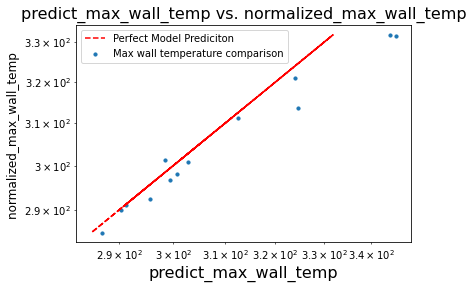

In [23]:
plt.scatter(predict_max_wall_temp,normalized_max_wall_temp,s=10, label='Max wall temperature comparison')
plt.plot(normalized_max_wall_temp,normalized_max_wall_temp,label='Perfect Model Prediciton', color = 'red',linestyle = '--')
plt.ylabel(r'normalized_max_wall_temp ',fontsize = 12)
plt.xlabel(r'predict_max_wall_temp',fontsize = 16)
plt.title('predict_max_wall_temp vs. normalized_max_wall_temp',fontsize=16)
plt.legend(loc='upper left')
plt.loglog()
plt.show()

In [ ]:


# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.






